# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = Path("../Resources/credit_data.csv")
df = pd.read_csv(file_path)
df.head()



,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,2,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,3,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,4,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,5,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
# Split target column from dataset
y = df['credit_risk']
X = df.drop(columns='credit_risk')

# Set Index
X = X.set_index('id')

In [4]:
# Print first five entries for target
y[:5]



0    good
1    good
2    good
3    good
4    good
Name: credit_risk, dtype: object

In [5]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

X.head()

,duration,amount,age,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,...,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes
id,,,,,,,,,,,,,,,,,,,,,
1,18,1049,21,0,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,1,0
2,9,2799,36,0,0,0,1,1,0,0,...,0,1,0,0,0,1,1,0,1,0
3,12,841,23,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
4,12,2122,39,0,0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
5,12,2171,38,0,0,0,1,1,0,0,...,0,0,0,1,1,0,1,0,0,1


In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [8]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)



In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)



In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Model Evaluation

In [13]:
# Displaying results
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         bad       0.76      0.42      0.54        74
        good       0.79      0.94      0.86       176

    accuracy                           0.79       250
   macro avg       0.78      0.68      0.70       250
weighted avg       0.78      0.79      0.77       250



## Feature Importance

In [14]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_



In [15]:
# Zip the feature importances with the associated feature name
important_features = zip(X.columns,rf_model.feature_importances_)

important_features

In [16]:
# Create a dataframe of the important features
importances_df = pd.DataFrame(important_features)

# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

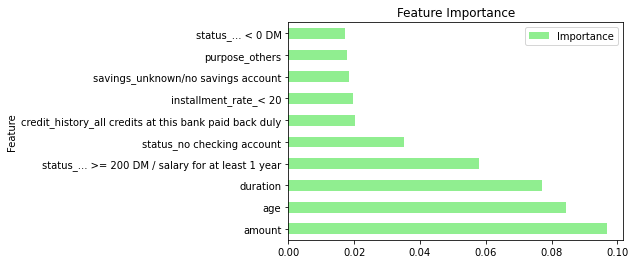

In [17]:
# Plot the top 10 most important features
importances_df[0:10].plot(
    kind='barh', 
    color='lightgreen', 
    title= 'Feature Importance', 
    legend=True)

In [18]:
importances_df.head()

,Importance
Feature,
amount,0.096938
age,0.084344
duration,0.077226
status_... >= 200 DM / salary for at least 1 year,0.057816
status_no checking account,0.035036
